In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split

# 1. Read the data set and understand the data

In [5]:
#Add the headers as there is no header defined in the data set
df = pd.read_csv('Qualitative_Bankruptcy.data.txt', names=['IR','MR','FF','CR','CO','OP','Class'])

In [6]:
df.shape

(250, 7)

In [7]:
df.head()

,IR,MR,FF,CR,CO,OP,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
IR       250 non-null object
MR       250 non-null object
FF       250 non-null object
CR       250 non-null object
CO       250 non-null object
OP       250 non-null object
Class    250 non-null object
dtypes: object(7)
memory usage: 13.8+ KB


In [9]:
df.isnull().sum()

IR       0
MR       0
FF       0
CR       0
CO       0
OP       0
Class    0
dtype: int64

NB    143
B     107
Name: Class, dtype: int64


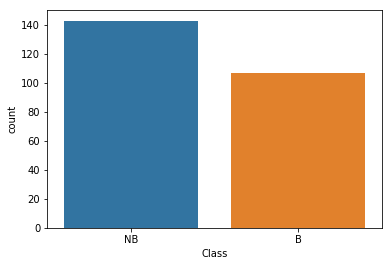

In [10]:
sns.countplot(x='Class', data=df)
print(df['Class'].value_counts())

# 2. Separate Labels from the Target variable

In [11]:
df_X = df.drop(labels='Class',axis=1)
df_Y = df['Class']

In [12]:
df_X.head()

,IR,MR,FF,CR,CO,OP
0,P,P,A,A,A,P
1,N,N,A,A,A,N
2,A,A,A,A,A,A
3,P,P,P,P,P,P
4,N,N,P,P,P,N


In [13]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
IR    250 non-null object
MR    250 non-null object
FF    250 non-null object
CR    250 non-null object
CO    250 non-null object
OP    250 non-null object
dtypes: object(6)
memory usage: 11.8+ KB


In [14]:
df_Y.head()

0    NB
1    NB
2    NB
3    NB
4    NB
Name: Class, dtype: object

# 3. Encode the categorical features

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_X_dummies = df_X.apply(le.fit_transform)
df_X_dummies = pd.get_dummies(data=df_X)

In [16]:
df_X_dummies.head()

,IR_A,IR_N,IR_P,MR_A,MR_N,MR_P,FF_A,FF_N,FF_P,CR_A,CR_N,CR_P,CO_A,CO_N,CO_P,OP_A,OP_N,OP_P
0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1
1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
2,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0


In [17]:
df_X_dummies.shape

(250, 18)

# 4. Split Data as Train and Test set

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df_X_dummies, df_Y, test_size=0.2, random_state=42)

In [19]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(200, 18) (50, 18)
(200,) (50,)


In [22]:
y_test.head()

142    NB
6      NB
97     NB
60     NB
112    NB
Name: Class, dtype: object

# 5. PCA on Train Data

In [23]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [24]:
X_pca = pca.transform(X_train)
X_pca.shape

(200, 18)

In [25]:
pca.explained_variance_

array([1.03944537e+00, 4.85513644e-01, 3.62808008e-01, 3.59907226e-01,
       3.26714449e-01, 3.00970962e-01, 2.68811266e-01, 2.28110820e-01,
       2.04005546e-01, 1.75765379e-01, 1.02045611e-01, 5.19318723e-02,
       4.97993596e-32, 2.64372295e-32, 9.37631024e-33, 7.65102743e-33,
       5.98332954e-33, 3.50218279e-33])

In [26]:
pca.explained_variance_ratio_

array([2.66112991e-01, 1.24298489e-01, 9.28840777e-02, 9.21414357e-02,
       8.36436065e-02, 7.70529029e-02, 6.88195573e-02, 5.83996566e-02,
       5.22283593e-02, 4.49984695e-02, 2.61251468e-02, 1.32953076e-02,
       1.27493536e-32, 6.76831167e-33, 2.40047052e-33, 1.95877327e-33,
       1.53181857e-33, 8.96609258e-34])

In [27]:
pca.components_.shape

(18, 18)

In [28]:
cov_matrix = np.cov(X_train.T)
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

In [29]:
print(eigen_values)

[ 1.03944537e+00  4.85513644e-01  5.19318723e-02  1.02045611e-01
  1.75765379e-01  2.04005546e-01  2.28110820e-01  3.62808008e-01
  3.59907226e-01  3.26714449e-01  3.00970962e-01  2.68811266e-01
  7.53813366e-16  5.67676456e-16  3.29189247e-16 -2.80791020e-16
 -1.88129194e-16  3.40496964e-17]


In [30]:
total = sum(eigen_values)
var_explained = [(i/total) * 100 for i in sorted(eigen_values, reverse=True)]
cum_var_explained = np.cumsum(var_explained)
print("Variable Explained : ", var_explained)
print("Cumulative Sum : ", cum_var_explained)

Variable Explained :  [26.611299136675076, 12.429848859011909, 9.288407774934454, 9.214143571337633, 8.36436064865542, 7.705290294195498, 6.881955729033812, 5.8399656632085435, 5.222835933818727, 4.499846947931512, 2.6125146834683326, 1.3295307577290427, 1.9298708324324017e-14, 1.453333523999457e-14, 8.427719038916192e-15, 8.717212903352058e-16, -4.816378432253693e-15, -7.188654693212824e-15]
Cumulative Sum :  [ 26.61129914  39.041148    48.32955577  57.54369934  65.90805999
  73.61335028  80.49530601  86.33527168  91.55810761  96.05795456
  98.67046924 100.         100.         100.         100.
 100.         100.         100.        ]


In [31]:
cum_var_explained

array([ 26.61129914,  39.041148  ,  48.32955577,  57.54369934,
        65.90805999,  73.61335028,  80.49530601,  86.33527168,
        91.55810761,  96.05795456,  98.67046924, 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        ])

# 6. Elbow Plot

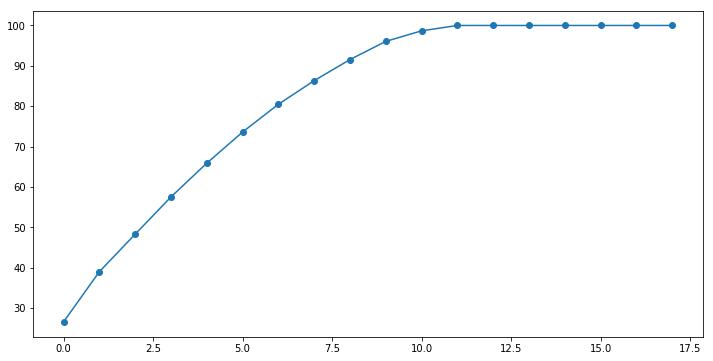

In [32]:
plt.figure(figsize=(12,6))
plt.plot([(i)for i in range(len(cum_var_explained))], cum_var_explained, marker = "o" )

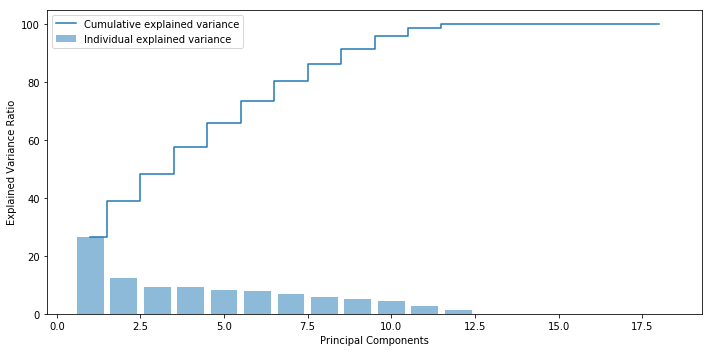

In [33]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eigen_values.size + 1), var_explained, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eigen_values.size + 1), cum_var_explained, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

*** From the above plots it is infered that 10 principal components are required to cover more than 95% variance ***

# 7. Use PCA and Transform the Data, using reduced components

*** From above analysis we need 10 prinicipal components to achieve > 95% variance ***

In [34]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_train)

In [35]:
X_pca

array([[-1.10416935,  0.66512967, -0.84442244, ..., -0.15942872,
        -0.07327267,  0.01246663],
       [ 1.37958043, -0.1550132 ,  0.54314084, ..., -0.33115754,
         0.23347587, -0.13731724],
       [ 0.36524704,  0.28466621,  0.33512533, ..., -0.68249628,
         0.5838421 ,  0.22201012],
       ...,
       [-0.27017493,  0.58455393, -1.24086532, ..., -0.59949991,
         0.76529232,  0.04113966],
       [ 0.62571486, -0.18474277, -0.2360809 , ...,  0.39095329,
        -0.16684848, -0.23284329],
       [-1.01791224, -0.53165759,  0.23958727, ...,  0.0155594 ,
         0.56446952,  0.55909404]])

# 8. KMeans on PCA transformed data

In [36]:
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [37]:
kmeans = KMeans(n_clusters=2, random_state=12)
cluster_labels = kmeans.fit_predict(X_pca)

In [38]:
kmeans.cluster_centers_

array([[ 1.09443026,  0.14155693,  0.07623431, -0.00969244,  0.01037209,
         0.00199765,  0.03187107,  0.01637064,  0.02097728,  0.01953722],
       [-0.82562282, -0.10678856, -0.05751009,  0.00731184, -0.00782456,
        -0.001507  , -0.02404309, -0.01234978, -0.01582496, -0.01473861]])

In [39]:
cluster_labels

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1], dtype=int32)

# 9. Silhouette analysis to find the optimal cluster

For n_clusters = 2 The average silhouette_score is : 0.23566729098881367 Cluster Inertia =  561.6922991125415


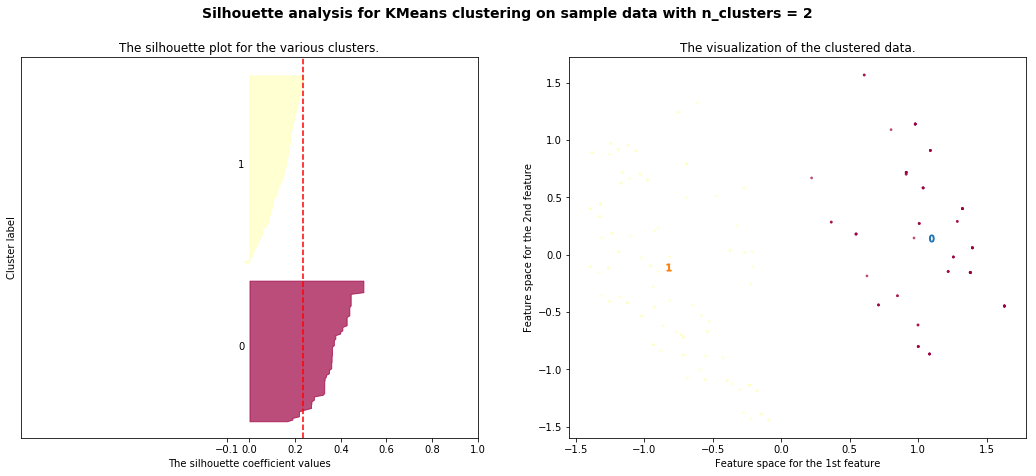

For n_clusters = 3 The average silhouette_score is : 0.22285671570829135 Cluster Inertia =  505.5931324201021


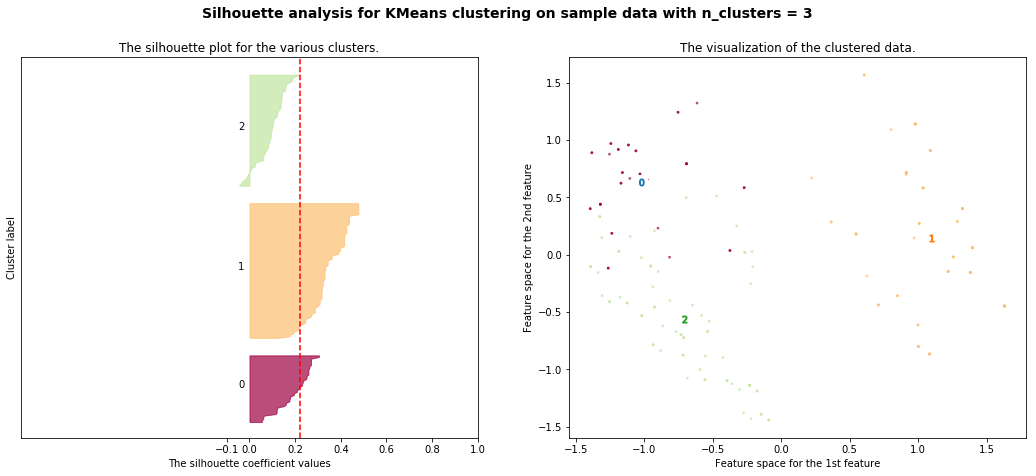

For n_clusters = 4 The average silhouette_score is : 0.16738974290966663 Cluster Inertia =  467.9958533357524


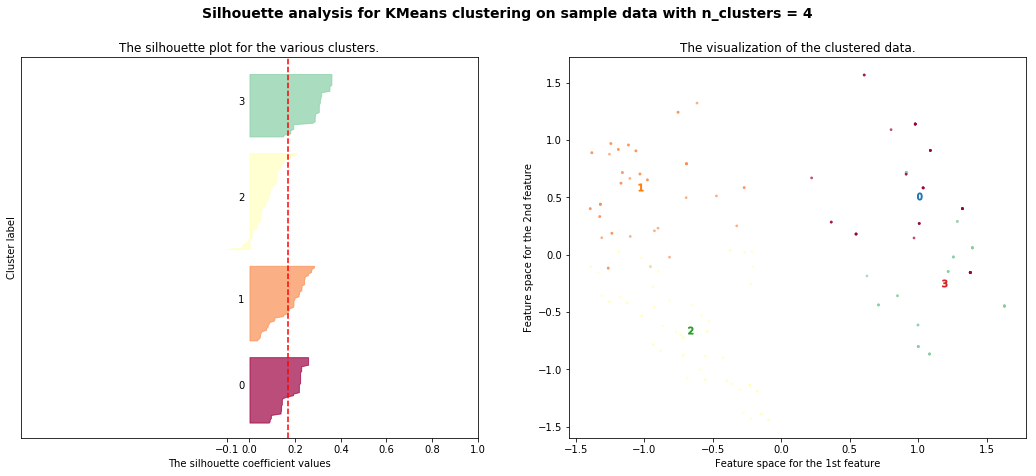

For n_clusters = 5 The average silhouette_score is : 0.22934494857450416 Cluster Inertia =  431.16954800835003


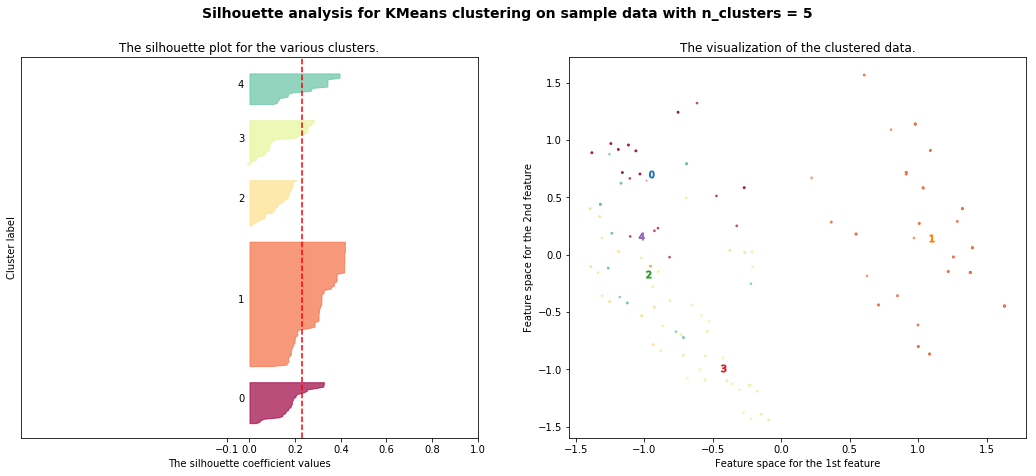

For n_clusters = 6 The average silhouette_score is : 0.18437655258800986 Cluster Inertia =  400.33222179261065


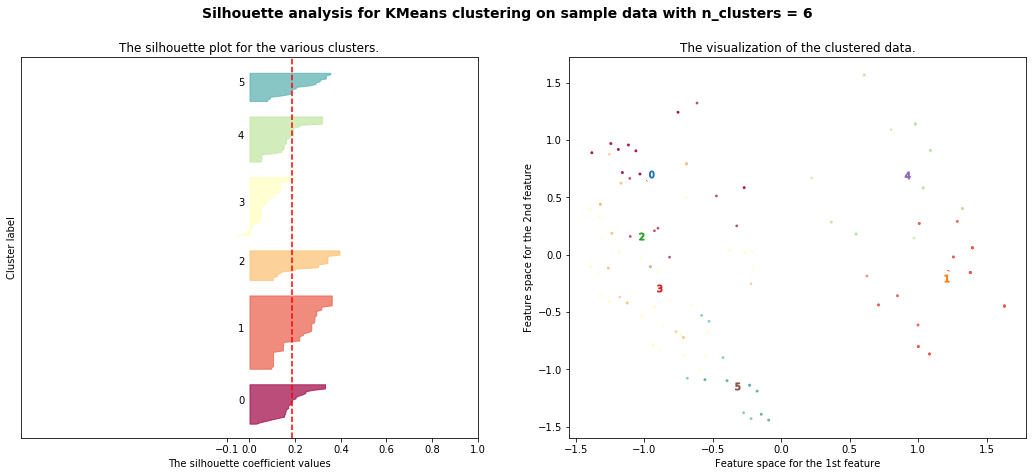

For n_clusters = 7 The average silhouette_score is : 0.19590312814547894 Cluster Inertia =  376.7475221311422


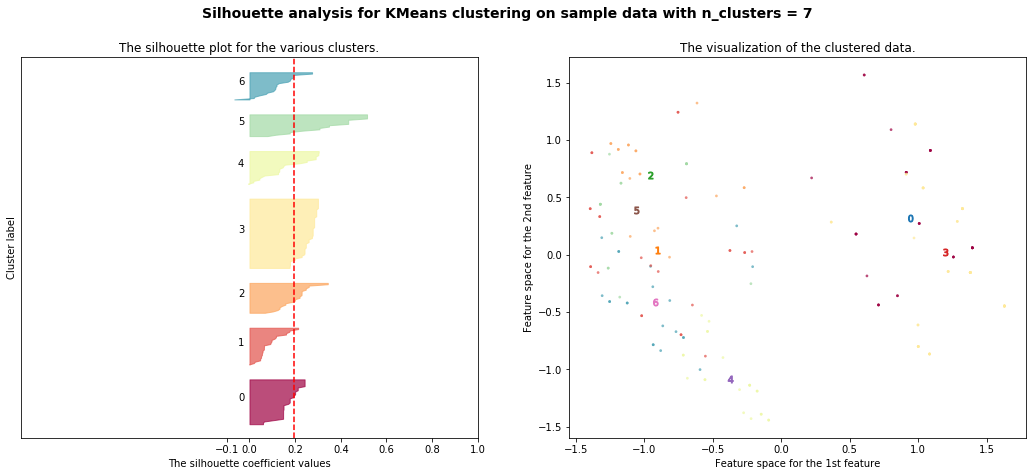

For n_clusters = 8 The average silhouette_score is : 0.20205934962538713 Cluster Inertia =  356.5702608163423


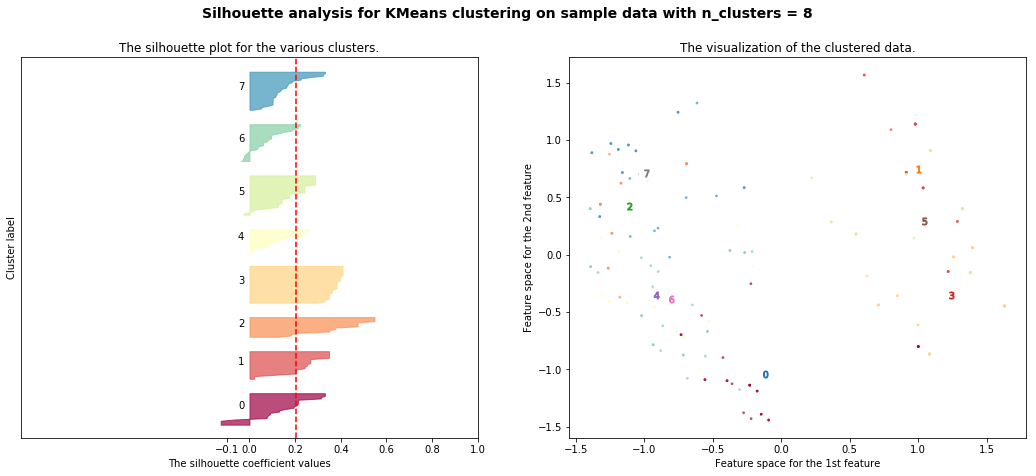

In [40]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for n_clusters in range_n_clusters:
    # Creating a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_pca) + (n_clusters + 1) * 10])
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 12 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=12)
    cluster_labels = clusterer.fit_predict(X_pca)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg, "Cluster Inertia = ", clusterer.inertia_)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_pca, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_pca[:, 0], X_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

# 10.Find Cluster labels using optimal clusters

In [41]:
kmeans = KMeans(n_clusters=2, random_state=12)
cluster_labels = kmeans.fit_predict(X_pca)

In [42]:
kmeans.cluster_centers_

array([[ 1.09443026,  0.14155693,  0.07623431, -0.00969244,  0.01037209,
         0.00199765,  0.03187107,  0.01637064,  0.02097728,  0.01953722],
       [-0.82562282, -0.10678856, -0.05751009,  0.00731184, -0.00782456,
        -0.001507  , -0.02404309, -0.01234978, -0.01582496, -0.01473861]])

In [43]:
cluster_labels

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1], dtype=int32)

In [44]:
X_train['labels'] = cluster_labels

In [45]:
X_train.head()

,IR_A,IR_N,IR_P,MR_A,MR_N,MR_P,FF_A,FF_N,FF_P,CR_A,CR_N,CR_P,CO_A,CO_N,CO_P,OP_A,OP_N,OP_P,labels
132,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1
225,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
238,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0
119,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1
136,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1


# 11.Transform Test data using same PCA

In [46]:
X_pca_test = pca.transform(X_test)
cluster_labels_test = kmeans.fit_predict(X_pca_test)
cluster_labels_test

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1], dtype=int32)

In [47]:
X_test['labels'] = cluster_labels_test

In [48]:
X_test.head()

,IR_A,IR_N,IR_P,MR_A,MR_N,MR_P,FF_A,FF_N,FF_P,CR_A,CR_N,CR_P,CO_A,CO_N,CO_P,OP_A,OP_N,OP_P,labels
142,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,1
6,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1
97,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1
60,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1
112,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1


# 12. SVC on Train and Test data set

In [49]:
X_train_svc = X_train.drop(labels=['labels'], axis=1)
y_train_svc = X_train.labels

In [50]:
X_test_svc = X_test.drop(labels=['labels'], axis=1)
y_test_svc = X_test.labels

In [51]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [52]:
# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train_svc, y_train_svc)

prediction = svc_model .predict(X_test_svc)
# check the accuracy on the training set
print(svc_model.score(X_train_svc, y_train_svc))
print(svc_model.score(X_test_svc, y_test_svc))
print("Confusion Matrix:\n",confusion_matrix(y_test_svc,prediction))
print("Accurace Score: ", accuracy_score(y_test_svc,prediction))

1.0
1.0
Confusion Matrix:
 [[21  0]
 [ 0 29]]
Accurace Score:  1.0


In [53]:
# Building a Support Vector Machine on train data
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train_svc, y_train_svc)

prediction = svc_model .predict(X_test_svc)
# check the accuracy on the training set
print(svc_model.score(X_train_svc, y_train_svc))
print(svc_model.score(X_test_svc, y_test_svc))
print("Confusion Matrix:\n",confusion_matrix(y_test_svc,prediction))
print("Accurace Score: ", accuracy_score(y_test_svc,prediction))

1.0
1.0
Confusion Matrix:
 [[21  0]
 [ 0 29]]
Accurace Score:  1.0


In [54]:
# Building a Support Vector Machine on train data
svc_model = SVC(kernel='poly')
svc_model.fit(X_train_svc, y_train_svc)

prediction = svc_model .predict(X_test_svc)
# check the accuracy on the training set
print(svc_model.score(X_train_svc, y_train_svc))
print(svc_model.score(X_test_svc, y_test_svc))
print("Confusion Matrix:\n",confusion_matrix(y_test_svc,prediction))
print("Accurace Score: ", accuracy_score(y_test_svc,prediction))

0.92
0.88
Confusion Matrix:
 [[15  6]
 [ 0 29]]
Accurace Score:  0.88


In [55]:
# Building a Support Vector Machine on train data
svc_model = SVC(kernel='sigmoid')
svc_model.fit(X_train_svc, y_train_svc)

prediction = svc_model .predict(X_test_svc)
# check the accuracy on the training set
print(svc_model.score(X_train_svc, y_train_svc))
print(svc_model.score(X_test_svc, y_test_svc))
print("Confusion Matrix:\n",confusion_matrix(y_test_svc,prediction))
print("Accurace Score: ", accuracy_score(y_test_svc,prediction))

0.995
1.0
Confusion Matrix:
 [[21  0]
 [ 0 29]]
Accurace Score:  1.0
